In [5]:
import os
from skimage import io, color, exposure
from skimage.transform import resize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
test_normal_dir = "../input/test/NORMAL"
test_pneumonia_dir = "../input/test/PNEUMONIA"
train_normal_dir = "../input/train/NORMAL"
train_pneumonia_dir = "../input/train/PNEUMONIA"
val_normal_dir = "../input/val/NORMAL"
val_pneumonia_dir = "../input/val/PNEUMONIA"
full_url = np.vectorize(lambda url,prev_url: prev_url+"/"+url)
test_normal_data = pd.DataFrame(full_url(np.array(os.listdir(test_normal_dir)),test_normal_dir), columns=["image_dir"])
test_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(test_pneumonia_dir)),test_pneumonia_dir), columns=["image_dir"])
train_normal_data = pd.DataFrame(full_url(np.array(os.listdir(train_normal_dir)),train_normal_dir), columns=["image_dir"])
train_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(train_pneumonia_dir)),train_pneumonia_dir), columns=["image_dir"])
val_normal_data = pd.DataFrame(full_url(np.array(os.listdir(val_normal_dir)),val_normal_dir), columns=["image_dir"])
val_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(val_pneumonia_dir)),val_pneumonia_dir), columns=["image_dir"])
test_normal_data["class"] = "NORMAL"
test_pneumonia_data["class"] = "PNEUNOMIA"
train_normal_data["class"] = "NORMAL"
train_pneumonia_data["class"] = "PNEUNOMIA"
val_normal_data["class"] = "NORMAL"
val_pneumonia_data["class"] = "PNEUNOMIA"
test_data = test_normal_data.append(test_pneumonia_data)
train_data = train_normal_data.append(train_pneumonia_data)
val_data = val_normal_data.append(val_pneumonia_data)
pd.get_dummies(train_data["class"])["NORMAL"]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3845    0
3846    0
3847    0
3848    0
3849    0
3850    0
3851    0
3852    0
3853    0
3854    0
3855    0
3856    0
3857    0
3858    0
3859    0
3860    0
3861    0
3862    0
3863    0
3864    0
3865    0
3866    0
3867    0
3868    0
3869    0
3870    0
3871    0
3872    0
3873    0
3874    0
Name: NORMAL, Length: 5216, dtype: uint8

In [3]:
print("Training data size",train_data.shape)
print("Test data size",test_data.shape)
print("Val data size",val_data.shape)

Training data size (5216, 2)
Test data size (624, 2)
Val data size (16, 2)


In [4]:
# train clases sizes
pd.DataFrame(train_data['class'].value_counts())

,class
PNEUNOMIA,3875
NORMAL,1341


In [5]:
# test clases sizes
pd.DataFrame(test_data['class'].value_counts())

,class
PNEUNOMIA,390
NORMAL,234


In [6]:
# val clases sizes
pd.DataFrame(val_data['class'].value_counts())

,class
NORMAL,8
PNEUNOMIA,8


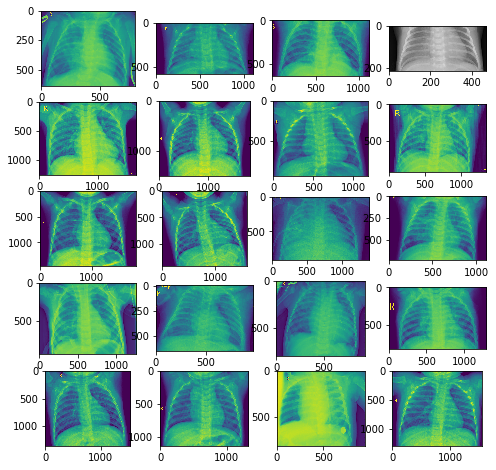

In [7]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
sample = train_data.sample(21)["image_dir"].values
for i in range(1, columns*rows +1):
    img = io.imread(sample[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

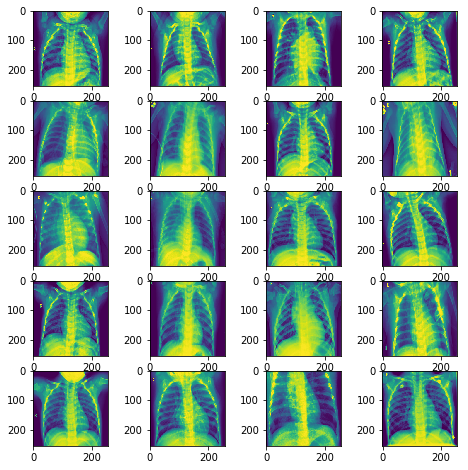

In [8]:
# preprocessed previsualization

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
sample = train_data.sample(21)["image_dir"].values
for i in range(1, columns*rows +1):
    image = io.imread(sample[i])
    image = resize(image, (256, 256), mode='reflect', anti_aliasing=True)
    image = color.rgb2gray(image)
    image = exposure.equalize_hist(image)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()